# Установка библиотек

In [9]:
!pip install pandas
!pip install phik


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import seaborn as sns


Загружаем предыдущую сессию в формате csv

In [11]:
data=pd.read_csv('/Users/kikot/OneDrive/Рабочий стол/123.csv')
data.head(6)

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-40908.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-33809.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/313709.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-91108.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
5,6,WSR/1-831/2019,09.04.2019,Исх01/040302.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...,NaN


проверяем наличие пустых значений

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   № п/п              4967 non-null   int64 
 1   №документа         4965 non-null   object
 2   Датарегистрации    4965 non-null   object
 3   Исх. №Дата         4967 non-null   object
 4   Адресат            4967 non-null   object
 5   Автор              4967 non-null   object
 6   Краткоесодержание  4967 non-null   object
 7   Примечание         308 non-null    object
dtypes: int64(1), object(7)
memory usage: 310.6+ KB


заполняем пустые значения , значением "пусто"

In [13]:
data1=data.fillna('пусто')
data1.head()

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-40908.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,пусто
1,2,WSR/1-837/2019,09.04.2019,05-33809.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,пусто
2,3,WSR/1-835/2019,09.04.2019,И10-14/313709.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,пусто
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,пусто
4,5,WSR/1-833/2019,09.04.2019,15-20/06-91108.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,пусто


Удаляем коллону Примечание , т.к. она бесполезна и почти пустая

In [14]:
data2=data1.drop(columns=['Примечание'])
data2

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание
0,1,WSR/1-838/2019,09.04.2019,208-40908.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,2,WSR/1-837/2019,09.04.2019,05-33809.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,3,WSR/1-835/2019,09.04.2019,И10-14/313709.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,5,WSR/1-833/2019,09.04.2019,15-20/06-91108.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,01.11.2017,1120.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,4964,WSR/1.-1751/2017,01.11.2017,ТС-1164/0631.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,4965,WSR/1.-1748/2017,01.11.2017,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...
4965,4966,WSR/1.-1747/2017,01.11.2017,ЛО-93/06пр24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


## 2.1 Классификация документов

Для классификации я буду использовать две модели random forest и SVM

In [15]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

data1, encoders = number_encode_features(data2) # Теперь encoded data содержит закодированные кат. признаки
data1.head()

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание
0,1,3435,96,2113,143,85,262
1,2,3434,96,848,143,724,2864
2,3,3430,96,4057,143,1827,544
3,4,3428,96,3981,48,313,2609
4,5,3426,96,1723,143,113,2971


### Random forest


In [16]:
X=data1

In [17]:
X

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание
0,1,3435,96,2113,143,85,262
1,2,3434,96,848,143,724,2864
2,3,3430,96,4057,143,1827,544
3,4,3428,96,3981,48,313,2609
4,5,3426,96,1723,143,113,2971
...,...,...,...,...,...,...,...
4962,4963,3563,8,1413,143,1069,3841
4963,4964,3565,8,4522,143,1541,3551
4964,4965,3562,8,4237,143,1232,3846
4965,4966,3561,8,4236,143,1232,3846


In [18]:
Y=data1['Адресат']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
col=['№п/п', '№документа', 'дата регистрации', 'исходный номер и дата',
       'Адресат', 'Автор', 'Краткое содежание']

Выводим значимость признаков и вывродим график

In [22]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.6285, 'Адресат'],
 [0.1379, '№документа'],
 [0.0628, 'Краткое содежание'],
 [0.0624, '№п/п'],
 [0.0426, 'исходный номер и дата'],
 [0.0343, 'Автор'],
 [0.0315, 'дата регистрации']]

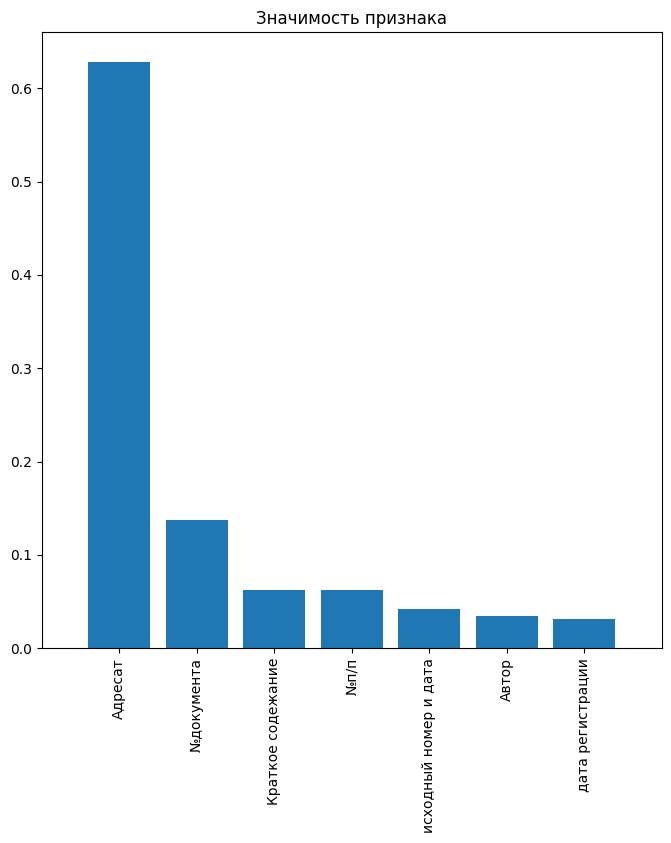

In [23]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

Самый значимый признак это Адресат и №документа

обучение модели Random Forest

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

присваиваем переменным x и y значение

In [25]:
X = data1.drop('Адресат', axis=1)
y = data1['Адресат']

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = model.predict(X_test)

оценка производительности/эффективности модели

In [53]:
# метрика r2
r2_score(model.predict(X_test), y_test)

-0.3406918857102619

выводим точность модели

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.44466800804828976


Точность модели: 0.917 
это отличный результат


### SVM

присваиваем значение x , y 

In [43]:
X = data1.drop('Адресат', axis=1)
y = data1['Адресат']

разделяем данные на обучающую и тестовую выборки

test_size=0.2 задает размер тестовой выборки в 20% от исходных данных.

random_state=42 задает начальное значение для генератора случайных чисел, чтобы результаты можно было воспроизвести.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

задаем модель

In [37]:
model = make_pipeline(StandardScaler(), SVC())

обучаем ее

In [38]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

присваиваем y_pred значение model.predict(X_test)

In [39]:
y_pred = model.predict(X_test)

выводим точность модели

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.44466800804828976


Точность модели 0.44 , что хуже предыдущего результата

## 2.2 Визуализация зависимостей данных

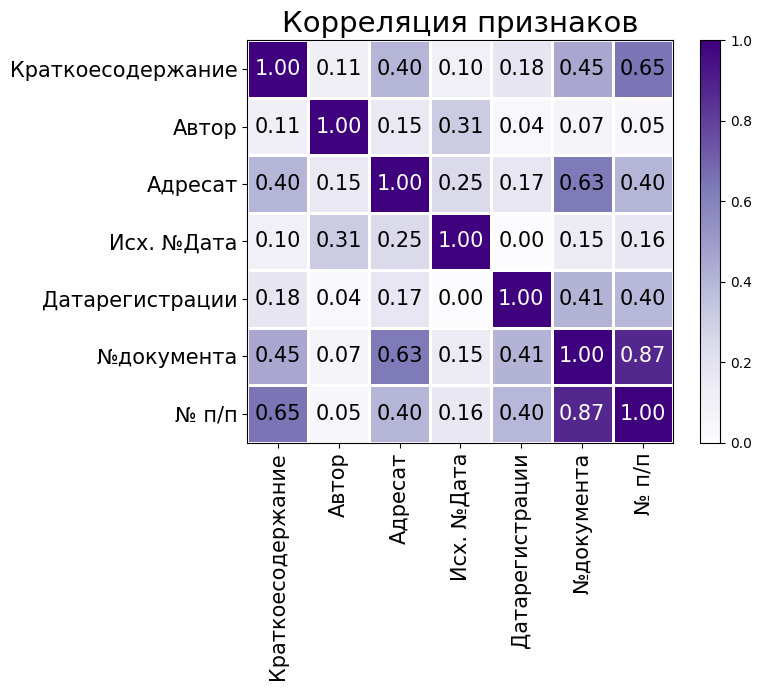

In [77]:
features_target = data1
interval_cols = data1
phik_overview = features_target.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Purples",
                        title="Корреляция признаков",
                        fontsize_factor=1.5,
                        figsize=(8, 7))
plt.tight_layout()


Наибольшую зависимость с атрибутом 'Адресат' имеет '№документа'.

## 2.3 Подготовка отчета

-Обоснование выбора модели классификации:

Я решил использовать две модели random forest и svm 


  Точность модели random forest: 0.917

  
  Точность модели svm : 0.44

-Выбор способов визуализации: 


я выбрал матрицу кореляции , так как с помощью нее можно наилучшим способом увидеть зависимость атрибутов
    

-Результаты визуализации:

Используя программные средства, визуализировал зависимости атрибутов в наборе данных.  Визуализация отражает влияние атрибутов на определение класса (адресата). Наибольшую зависимость с атрибутом 'Адресат' имеет '№документа'.

-Обоснование способа разделения на обучающую и тестирующую выборки:


test_size=0.2 задает размер тестовой выборки в 20% от исходных данных.

random_state=42 задает начальное значение для генератора случайных чисел, чтобы результаты можно было воспроизвести.

In [ ]:
data2.to_csv("data2.csv", index=False)